In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("diamonds.csv")

In [5]:
lb=LabelEncoder()

In [6]:
df["cut_encode"]=lb.fit_transform(df["cut"])
df["color_encode"]=lb.fit_transform(df["color"])
df["clarity_encode"]=lb.fit_transform(df["clarity"])

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encode,color_encode,clarity_encode
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


<Axes: >

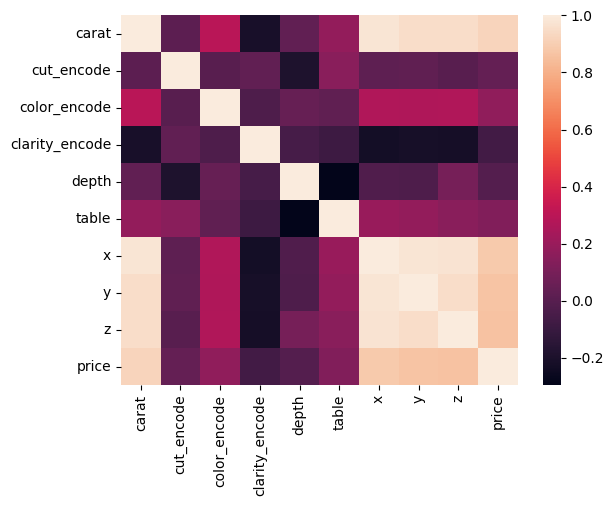

In [9]:
sns.heatmap(df[["carat","cut_encode","color_encode","clarity_encode","depth","table","x","y","z","price"]].corr(),fmt="2f")

In [14]:
x=df[["carat","cut_encode","color_encode","clarity_encode","depth","table","x","y","z"]]
y=df["price"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)

0.8780440250576975

In [18]:
import pickle

In [19]:
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)